## Connect to google drive and checking for dataset availability

In [ ]:
#Mount Google Drive and check dataset availability
from google.colab import drive
import os

drive.mount('/content/drive')

dataset_path = "/content/drive/MyDrive/PlantDieseses/color"

# Check if dataset exists
if os.path.exists(dataset_path):
    print("Dataset found at:", dataset_path)
    print("Total folders found:", len(os.listdir(dataset_path)))
else:
    print("Dataset not found at the specified path. Please check the path.")

Mounted at /content/drive
Dataset found at: /content/drive/MyDrive/PlantDieseses/color
Total folders found: 38


## Importing Dependensies

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import random

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


## Exploring dataset

In [ ]:
# Explore dataset structure
def explore_dataset(path):
    classes = os.listdir(path)
    print(f"Total classes: {len(classes)}")

    # Count images per class
    class_counts = {}
    for cls in classes:
        class_path = os.path.join(path, cls)
        if os.path.isdir(class_path):
            count = len(os.listdir(class_path))
            class_counts[cls] = count

    # Convert to DataFrame for better visualization
    df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Count'])
    df = df.sort_values('Count', ascending=False)

    return df

df_counts = explore_dataset(dataset_path)
print("\nTop 10 classes by image count:")
display(df_counts.head(10))

Total classes: 38

Top 10 classes by image count:


,Count
Orange___Haunglongbing_(Citrus_greening),5517
Soybean___healthy,5109
Tomato___Tomato_Yellow_Leaf_Curl_Virus,4267
Peach___Bacterial_spot,2297
Tomato___Bacterial_spot,2140
Tomato___Late_blight,1909
Squash___Powdery_mildew,1835
Tomato___Septoria_leaf_spot,1771
Tomato___Spider_mites Two-spotted_spider_mite,1676
Apple___healthy,1645


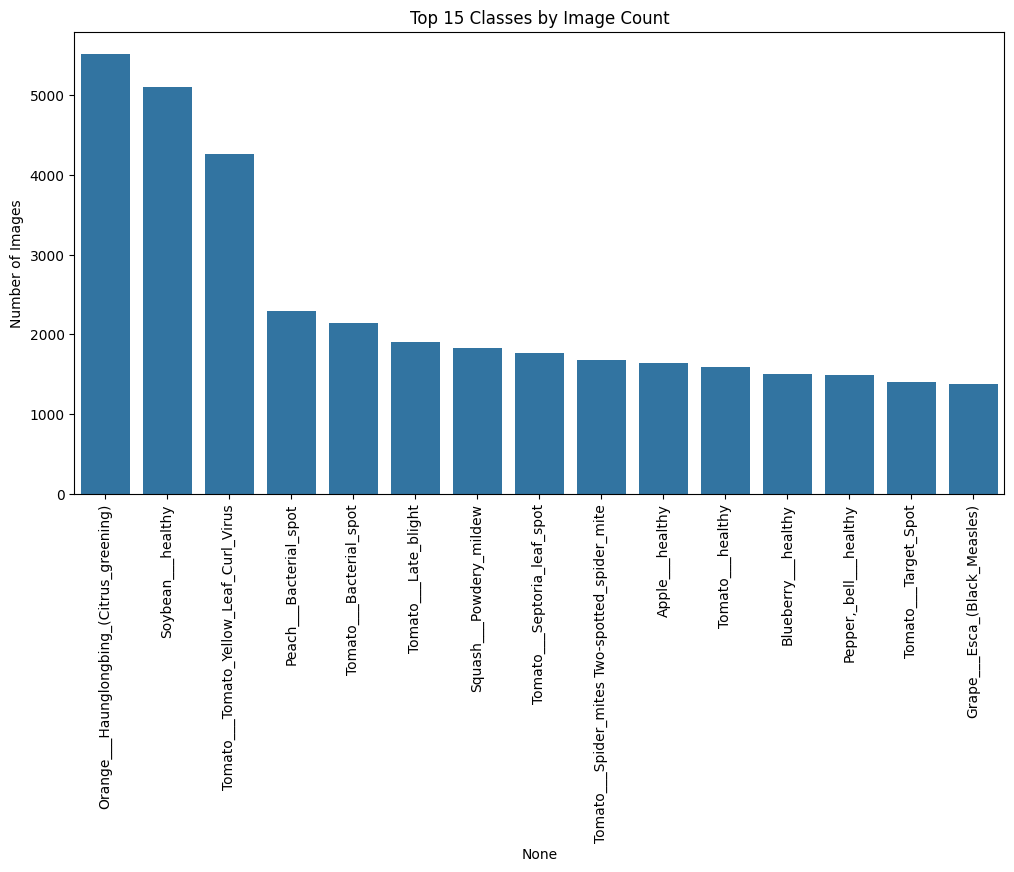


Class distribution statistics:
             Count
count    38.000000
mean   1402.131579
std    1193.082022
min     152.000000
25%     687.500000
50%    1092.500000
75%    1631.500000
max    5517.000000


In [ ]:
# Visualize class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=df_counts.index[:15], y=df_counts['Count'][:15])
plt.title('Top 15 Classes by Image Count')
plt.xticks(rotation=90)
plt.ylabel('Number of Images')
plt.show()

print("\nClass distribution statistics:")
print(df_counts.describe())

Sample images from random classes:


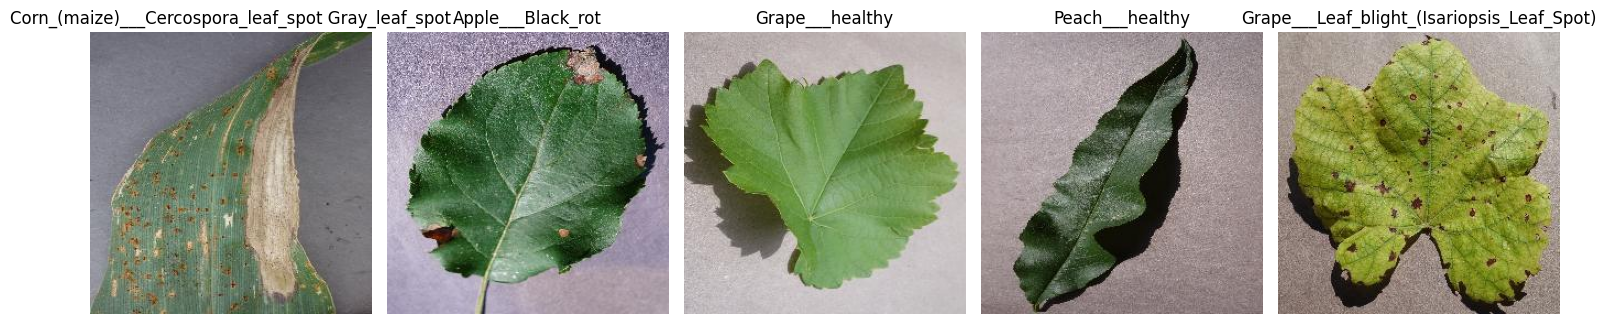

In [ ]:
# Sample image visualization
def display_sample_images(path, num_samples=5):
    classes = os.listdir(path)
    plt.figure(figsize=(15, 10))

    for i, cls in enumerate(random.sample(classes, num_samples)):
        class_path = os.path.join(path, cls)
        img_files = os.listdir(class_path)
        img_path = os.path.join(class_path, random.choice(img_files))

        img = Image.open(img_path)

        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

print("Sample images from random classes:")
display_sample_images(dataset_path)

Unique image dimensions found: {(256, 256)}
Most common dimension: (256, 256)


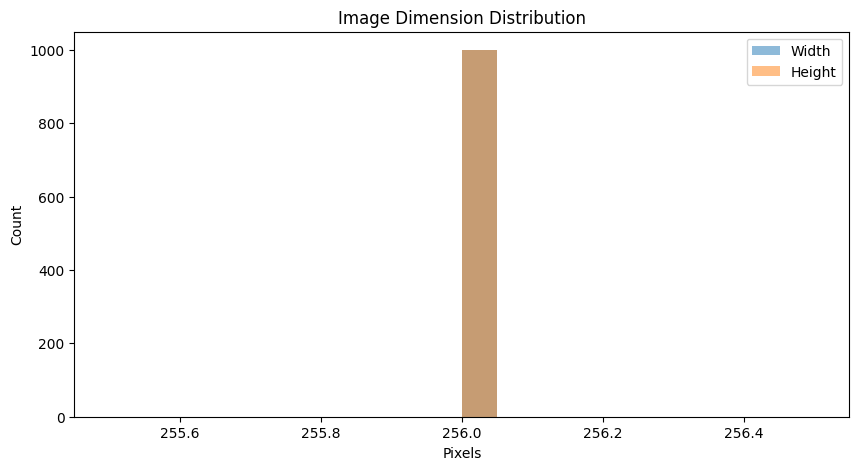

In [ ]:
# Check image dimensions
def check_image_dimensions(path, sample_size=100):
    classes = os.listdir(path)
    dimensions = []

    # Sample from each class to save time
    for cls in random.sample(classes, min(10, len(classes))):  # Check 10 random classes
        class_path = os.path.join(path, cls)
        img_files = os.listdir(class_path)

        for img_file in random.sample(img_files, min(sample_size, len(img_files))):
            img_path = os.path.join(class_path, img_file)
            with Image.open(img_path) as img:
                dimensions.append(img.size)

    # Analyze dimensions
    unique_dims = set(dimensions)
    print(f"Unique image dimensions found: {unique_dims}")
    print(f"Most common dimension: {max(set(dimensions), key=dimensions.count)}")

    # Plot distribution
    plt.figure(figsize=(10, 5))
    plt.hist([d[0] for d in dimensions], bins=20, alpha=0.5, label='Width')
    plt.hist([d[1] for d in dimensions], bins=20, alpha=0.5, label='Height')
    plt.title('Image Dimension Distribution')
    plt.xlabel('Pixels')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

check_image_dimensions(dataset_path)

In [ ]:
# Data preprocessing - Create DataFrame with image paths and labels
def create_image_df(path):
    data = []
    classes = os.listdir(path)

    for cls in classes:
        class_path = os.path.join(path, cls)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                data.append({'image_path': img_path, 'label': cls})

    return pd.DataFrame(data)

df_images = create_image_df(dataset_path)
print(f"Total images in dataset: {len(df_images)}")
display(df_images.head())

Total images in dataset: 53281


,image_path,label
0,/content/drive/MyDrive/PlantDieseses/color/App...,Apple___Apple_scab
1,/content/drive/MyDrive/PlantDieseses/color/App...,Apple___Apple_scab
2,/content/drive/MyDrive/PlantDieseses/color/App...,Apple___Apple_scab
3,/content/drive/MyDrive/PlantDieseses/color/App...,Apple___Apple_scab
4,/content/drive/MyDrive/PlantDieseses/color/App...,Apple___Apple_scab


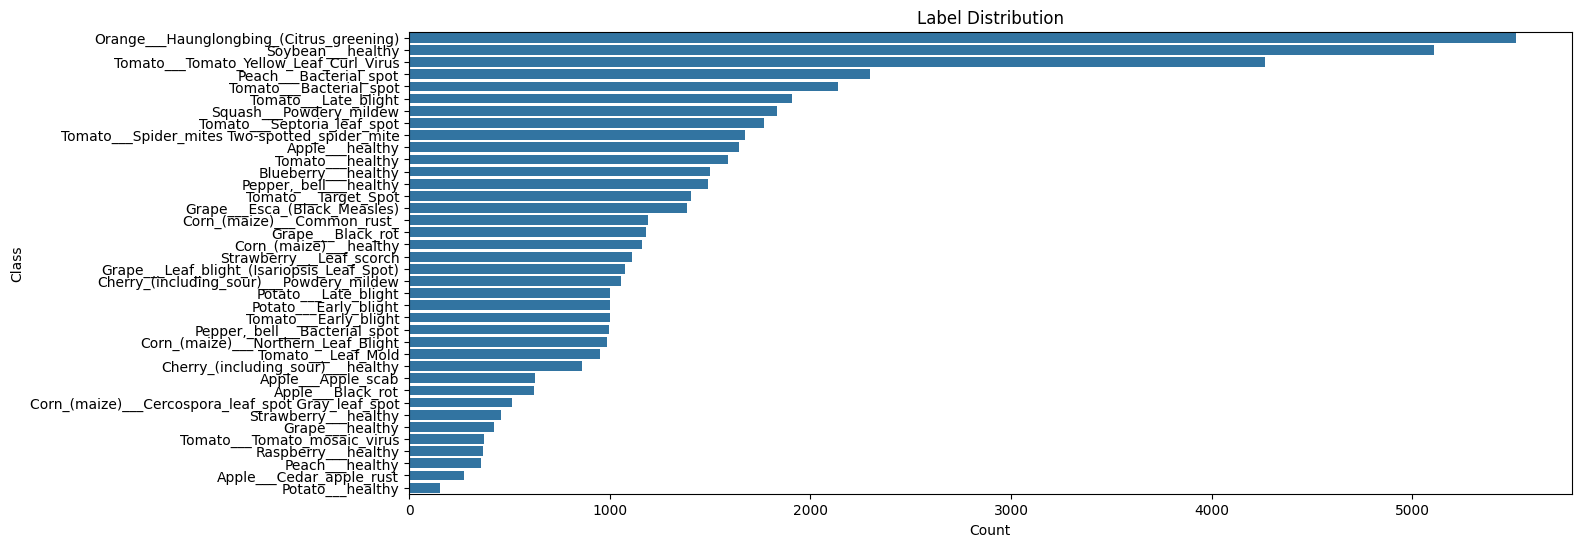


Class counts:
label
Orange___Haunglongbing_(Citrus_greening)              5517
Soybean___healthy                                     5109
Tomato___Tomato_Yellow_Leaf_Curl_Virus                4267
Peach___Bacterial_spot                                2297
Tomato___Bacterial_spot                               2140
Tomato___Late_blight                                  1909
Squash___Powdery_mildew                               1835
Tomato___Septoria_leaf_spot                           1771
Tomato___Spider_mites Two-spotted_spider_mite         1676
Apple___healthy                                       1645
Tomato___healthy                                      1591
Blueberry___healthy                                   1502
Pepper,_bell___healthy                                1488
Tomato___Target_Spot                                  1404
Grape___Esca_(Black_Measles)                          1385
Corn_(maize)___Common_rust_                           1192
Grape___Black_rot                  

In [ ]:
# Analyze label distribution
plt.figure(figsize=(15, 6))
sns.countplot(data=df_images, y='label', order=df_images['label'].value_counts().index)
plt.title('Label Distribution')
plt.xlabel('Count')
plt.ylabel('Class')
plt.show()

print("\nClass counts:")
print(df_images['label'].value_counts())

In [ ]:
# Encode labels
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform labels
df_images['label_encoded'] = label_encoder.fit_transform(df_images['label'])

print("Label encoding completed.")
print("\nLabel mapping:")
for i, cls in enumerate(label_encoder.classes_):
    print(f"{cls}: {i}")

display(df_images[['label', 'label_encoded']].head())

Label encoding completed.

Label mapping:
Apple___Apple_scab: 0
Apple___Black_rot: 1
Apple___Cedar_apple_rust: 2
Apple___healthy: 3
Blueberry___healthy: 4
Cherry_(including_sour)___Powdery_mildew: 5
Cherry_(including_sour)___healthy: 6
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 7
Corn_(maize)___Common_rust_: 8
Corn_(maize)___Northern_Leaf_Blight: 9
Corn_(maize)___healthy: 10
Grape___Black_rot: 11
Grape___Esca_(Black_Measles): 12
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 13
Grape___healthy: 14
Orange___Haunglongbing_(Citrus_greening): 15
Peach___Bacterial_spot: 16
Peach___healthy: 17
Pepper,_bell___Bacterial_spot: 18
Pepper,_bell___healthy: 19
Potato___Early_blight: 20
Potato___Late_blight: 21
Potato___healthy: 22
Raspberry___healthy: 23
Soybean___healthy: 24
Squash___Powdery_mildew: 25
Strawberry___Leaf_scorch: 26
Strawberry___healthy: 27
Tomato___Bacterial_spot: 28
Tomato___Early_blight: 29
Tomato___Late_blight: 30
Tomato___Leaf_Mold: 31
Tomato___Septoria_leaf_spot: 32
Toma

,label,label_encoded
0,Apple___Apple_scab,0
1,Apple___Apple_scab,0
2,Apple___Apple_scab,0
3,Apple___Apple_scab,0
4,Apple___Apple_scab,0


## Spliting Dataset

Training set size: 37294
Validation set size: 7994
Test set size: 7993


<ipython-input-11-fb28dcb877bd>:35: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


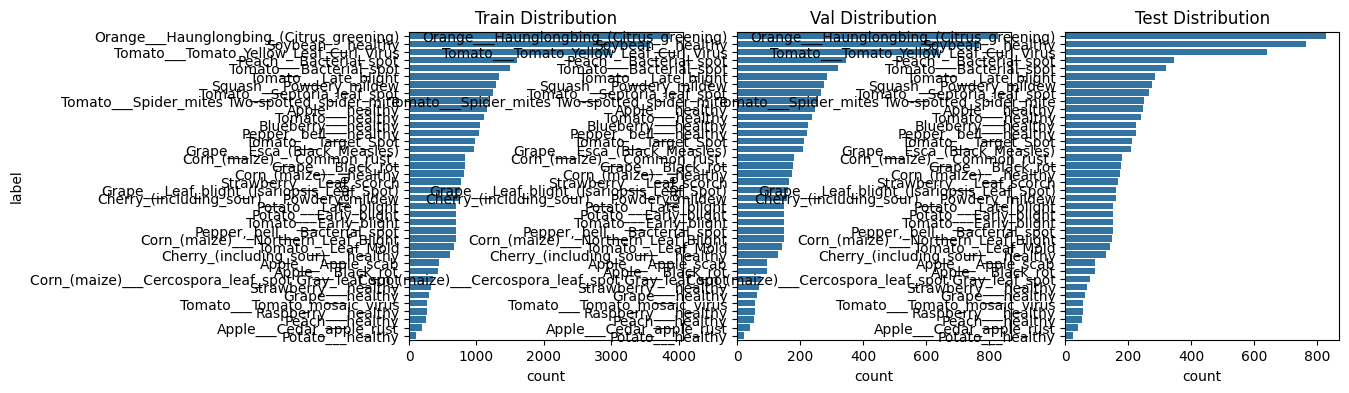

In [ ]:
# Split dataset into train, validation, and test sets
from sklearn.model_selection import train_test_split

# First split into train+val and test
train_val_df, test_df = train_test_split(
    df_images,
    test_size=0.15,
    random_state=42,
    stratify=df_images['label_encoded']
)

# Then split train_val into train and val
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.1765,  # Results in 15% val and 70% train (0.1765 * 0.85 ≈ 0.15)
    random_state=42,
    stratify=train_val_df['label_encoded']
)

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

# Verify distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.countplot(data=train_df, y='label', order=df_images['label'].value_counts().index)
plt.title('Train Distribution')
plt.subplot(1, 3, 2)
sns.countplot(data=val_df, y='label', order=df_images['label'].value_counts().index)
plt.title('Val Distribution')
plt.subplot(1, 3, 3)
sns.countplot(data=test_df, y='label', order=df_images['label'].value_counts().index)
plt.title('Test Distribution')
plt.tight_layout()
plt.show()

In [ ]:
# Import deep learning libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Check TensorFlow version and GPU availability
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

# Set random seeds for reproducibility
tf.random.set_seed(42)

TensorFlow version: 2.18.0
GPU available: []


In [ ]:
# Create data generators with augmentation
# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test generators
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print("Data generators created successfully!")

Data generators created successfully!


In [ ]:
# Create data pipelines
def create_data_generator(df, generator, shuffle=False):
    return generator.flow_from_dataframe(
        dataframe=df,
        x_col='image_path',
        y_col='label',
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=shuffle
    )

# Create generators
train_generator = create_data_generator(train_df, train_datagen, shuffle=True)
val_generator = create_data_generator(val_df, val_datagen)
test_generator = create_data_generator(test_df, test_datagen)

# Print class indices to verify
print("Class indices:", train_generator.class_indices)

Found 37294 validated image filenames belonging to 38 classes.
Found 7994 validated image filenames belonging to 38 classes.
Found 7993 validated image filenames belonging to 38 classes.
Class indices: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean_

In [ ]:
# Build the model
def build_model(num_classes):
    base_model = tf.keras.applications.EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
    )

    # Freeze base model layers
    base_model.trainable = False

    # Create new model on top
    inputs = tf.keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

num_classes = len(train_generator.class_indices)
model = build_model(num_classes)
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,387,273 (16.74 MB)

 Trainable params: 337,702 (1.29 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
# Define callbacks
# Define model checkpoint path
model_path = '/content/drive/MyDrive/PlantDieseses/best_model.h5'

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(
        filepath=model_path,
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=3,
        verbose=1
    )
]

print("Callbacks defined successfully!")

Callbacks defined successfully!


In [ ]:
#  Train the model
EPOCHS = 30

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.0968 - loss: 3.4398
Epoch 1: val_accuracy improved from -inf to 0.10379, saving model to /content/drive/MyDrive/PlantDieseses/best_model.h5


1165/1165 ━━━━━━━━━━━━━━━━━━━━ 13739s 12s/step - accuracy: 0.0968 - loss: 3.4398 - val_accuracy: 0.1038 - val_loss: 3.3781 - learning_rate: 0.0010
Epoch 2/30
   1/1165 ━━━━━━━━━━━━━━━━━━━━ 44:55 2s/step - accuracy: 0.0938 - loss: 3.5394

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.10379
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 648s 555ms/step - accuracy: 0.0938 - loss: 3.5394 - val_accuracy: 0.1038 - val_loss: 3.3790 - learning_rate: 0.0010
Epoch 3/30
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1023 - loss: 3.3962
Epoch 3: val_accuracy did not improve from 0.10379
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 4363s 4s/step - accuracy: 0.1023 - loss: 3.3962 - val_accuracy: 0.1038 - val_loss: 3.3630 - learning_rate: 0.0010
Epoch 4/30
   1/1165 ━━━━━━━━━━━━━━━━━━━━ 1:00:09 3s/step - accuracy: 0.1250 - loss: 3.3182
Epoch 4: val_accuracy did not improve from 0.10379
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 649s 555ms/step - accuracy: 0.1250 - loss: 3.3182 - val_accuracy: 0.1038 - val_loss: 3.3626 - learning_rate: 0.0010
Epoch 5/30
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1010 - loss: 3.3907
Epoch 5: val_accuracy did not improve from 0.10379
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 4229s 4s/step - accuracy: 0.1010 - loss: 3.3907 - val_accur

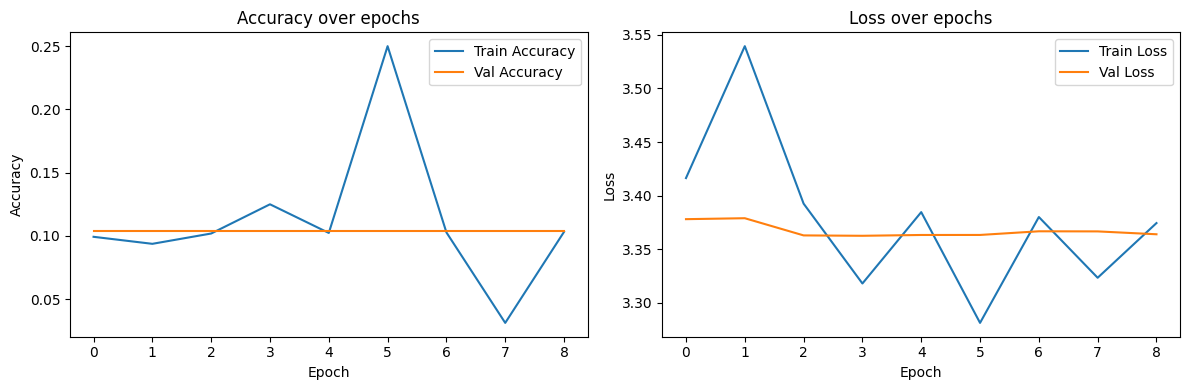

In [ ]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy over epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [ ]:
# Evaluate on test set
# Load best saved model
best_model = tf.keras.models.load_model(model_path)

# Evaluate
test_loss, test_acc = best_model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 2112s 8s/step - accuracy: 0.0986 - loss: 3.5234

Test Accuracy: 10.36%
Test Loss: 3.5184


In [ ]:
#  Save model and label encoder
import time
from tensorflow.keras.models import save_model
import pickle

# Generate timestamp
timestamp = time.strftime("%Y%m%d-%H%M%S")

#  Save in modern .keras format
final_model_path = f'/content/drive/MyDrive/PlantDieseses/final_model_{timestamp}.keras'
best_model.save(final_model_path)
print(f"✅ Model saved in Keras format to: {final_model_path}")

# Additional save as HDF5
try:
    h5_path = f'/content/drive/MyDrive/PlantDieseses/final_model_{timestamp}.h5'
    save_model(best_model, h5_path, save_format='h5')
    print(f"✅ Model saved in HDF5 format to: {h5_path}")
except Exception as e:
    print(f"⚠️ HDF5 save failed (normal for some models): {str(e)}")

# Save label encoder
encoder_path = f'/content/drive/MyDrive/PlantDieseses/label_encoder_{timestamp}.pkl'
with open(encoder_path, 'wb') as f:
    pickle.dump(label_encoder, f)
print(f"✅ Label encoder saved to: {encoder_path}")

# Save model weights separately
weights_path = f'/content/drive/MyDrive/PlantDieseses/model_weights_{timestamp}.weights.h5'
best_model.save_weights(weights_path)
print(f"✅ Model weights saved to: {weights_path}")

✅ Model saved in Keras format to: /content/drive/MyDrive/PlantDieseses/final_model_20250520-185230.keras
⚠️ HDF5 save failed (normal for some models): cannot pickle 'module' object
✅ Label encoder saved to: /content/drive/MyDrive/PlantDieseses/label_encoder_20250520-185230.pkl
✅ Model weights saved to: /content/drive/MyDrive/PlantDieseses/model_weights_20250520-185230.weights.h5


Testing on: /content/drive/MyDrive/PlantDieseses/color/Squash___Powdery_mildew/2b46f95e-4b4a-4d2d-a7a6-ebf630bf72af___MD_Powd.M 0824.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


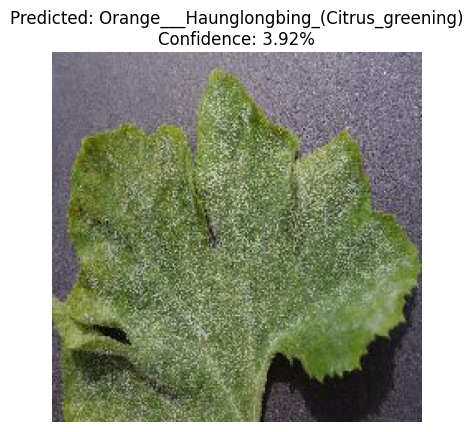

In [ ]:
#  Create a prediction function for demonstration
def predict_disease(model, label_encoder, image_path):
    img = tf.keras.preprocessing.image.load_img(
        image_path,
        target_size=IMG_SIZE
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    img_array = img_array / 255.0  # Normalize

    predictions = model.predict(img_array)
    predicted_class = label_encoder.inverse_transform([np.argmax(predictions)])[0]
    confidence = np.max(predictions) * 100

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.show()

    return predicted_class, confidence

# Test with a random image
sample_image = random.choice(test_df['image_path'].values)
print(f"Testing on: {sample_image}")
pred_class, confidence = predict_disease(best_model, label_encoder, sample_image)